# Chapter: Exploratory Data Analysis: Getting to Know Your Data Well


# Topic: Non-Gaussianity Assessment

In [1]:
# import required packages
import numpy as np, matplotlib.pyplot as plt
import scipy.spatial, scipy.stats

plt.rcParams.update({'font.size': 20})

In [2]:
# generate data
np.random.seed(1)

# non-Gaussian
x1 = np.random.uniform(size=1000)
x2 = np.random.uniform(size=1000)
e = np.random.normal(loc=0, scale=0.1, size=(1000,))
x3 = x1+x2+e
data = np.vstack((x1,x2,x3)).T

C:\Users\f0ne44\AppData\Local\Temp/ipykernel_27456/1226825382.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


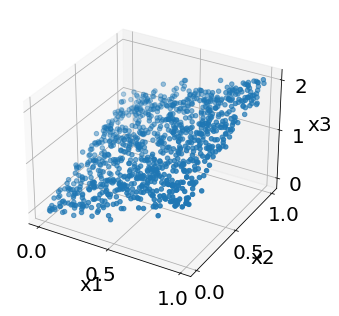

In [3]:
# 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x1,x2,x3)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.show()

In [4]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#                    check for non-gaussianity
# Code adapted from KydLIB package (https://github.com/afraniomelo/KydLIB/)
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

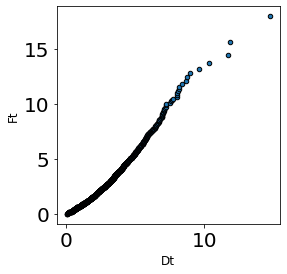

In [5]:
# find data statistics
N, m = data.shape[0], data.shape[1]

mu, Scov = np.mean(data, axis=0), np.cov(data, rowvar=False, ddof=1)
Scov_inv = np.linalg.pinv(Scov)

# calculate D statistic and the fractiles, and plot Dt vs Ft
D = np.array([scipy.spatial.distance.mahalanobis(data[i,:], mu, Scov_inv)**2 for i in range(N)])
Dt, rt = np.sort(D), [(t-0.5)/N for t in range(1,N+1)]
Ft = (m*(N**2-1)/(N*(N-m)))*np.array([scipy.stats.f.ppf(p, m, N-m) for p in rt])

plt.figure(figsize=(4,4))
plt.scatter(Dt, Ft, edgecolor='black', s=20)
plt.xlabel('Dt', fontsize=12)
plt.ylabel('Ft', fontsize=12)

plt.show()

Intercept, Slope:  -0.9251716577827129 1.314482189232167


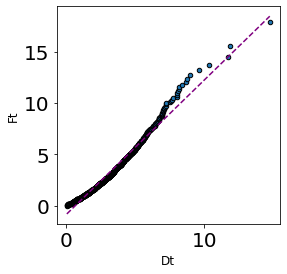

In [7]:
# fit a straight line
linearFit = scipy.stats.linregress(Dt, Ft)
intercept, slope = linearFit[1], linearFit[0]
print('Intercept, Slope: ', intercept, slope)

# draw staright line
x = np.linspace(Dt[0], Dt[-1])
y = slope*x + intercept

plt.figure(figsize=(4, 4))
plt.scatter(Dt, Ft, edgecolor='black', s=20)
plt.plot(x, y, color='purple', ls='--')
plt.xlabel('Dt', fontsize=12)
plt.ylabel('Ft', fontsize=12)

plt.show()

In [8]:
# perform significance tests and make inference
Fbar = np.mean(Ft)
Sfit = np.sqrt(((Ft-(intercept+slope*Dt))**2).sum()/(N-2))
Sfit_by_Fbar = Sfit/Fbar
print('S / Fbar: ', Sfit_by_Fbar)

if Sfit_by_Fbar > 0.15:
    gaussianity = False
else:
    if np.abs(slope-1) < 0.2 and np.abs(intercept) < Fbar*0.05:
        gaussianity = True
    else:
        gaussianity = False

print('Gaussianity: ', gaussianity)

S / Fbar:  0.11849627253356583
Gaussianity:  False
